Age                         int64
Purchase Amount (USD)       int64
Previous Purchases          int64
Review Rating             float64
Frequency of Purchases     object
dtype: object


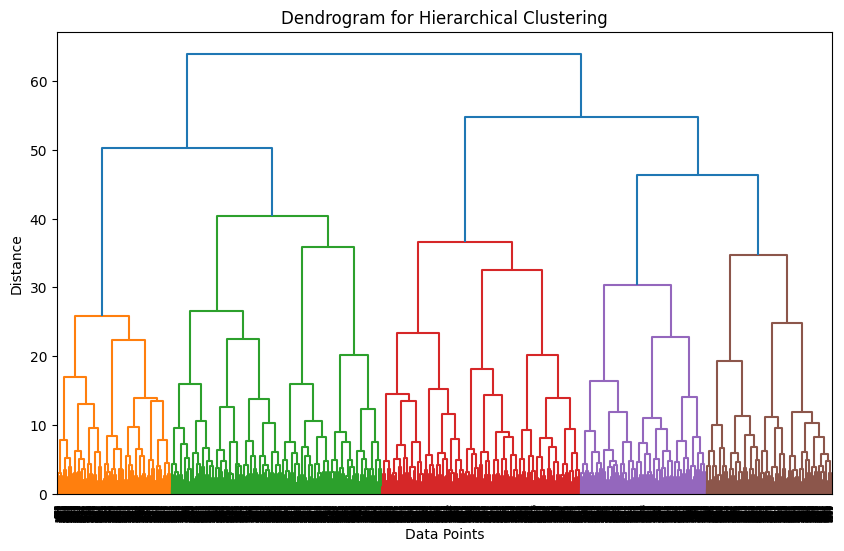

Silhouette Score - Hierarchical Clustering: 0.0855
Silhouette Score - K-Means: 0.1459
Davies-Bouldin Index - Hierarchical Clustering: 2.1899
Davies-Bouldin Index - K-Means: 1.8525


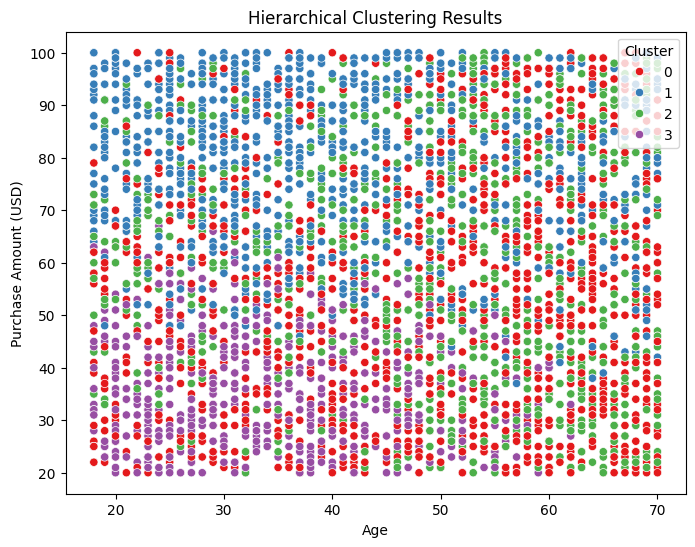

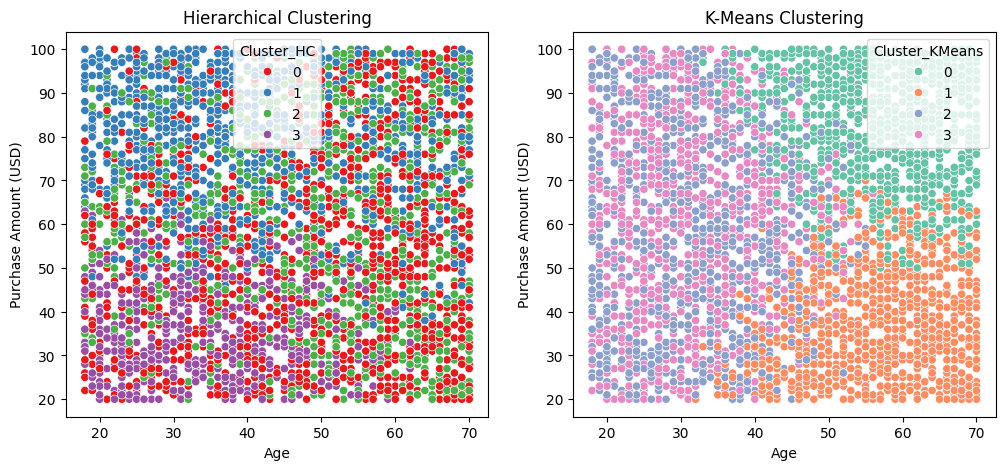

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Đọc dữ liệu
data_path = "data/shopping_behavior_updated.csv"
df = pd.read_csv(data_path)

# Chọn các cột số để phân cụm
selected_columns = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating', 'Frequency of Purchases']

# Kiểm tra kiểu dữ liệu
print(df[selected_columns].dtypes)

# Xử lý cột không phải số
if 'Frequency of Purchases' in df.columns and df['Frequency of Purchases'].dtype == 'object':
    df['Frequency of Purchases'] = LabelEncoder().fit_transform(df['Frequency of Purchases'])

# Giữ lại chỉ các cột số
data = df[selected_columns].select_dtypes(include=['number']).dropna()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Vẽ dendrogram để xác định số cụm tối ưu
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Áp dụng phân cụm thứ bậc với số cụm k tối ưu
k = 4  # Chọn số cụm từ dendrogram
hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
clusters_hc = hierarchical.fit_predict(data_scaled)
df['Cluster_HC'] = clusters_hc

# So sánh với K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)
df['Cluster_KMeans'] = clusters_kmeans

# Đánh giá hiệu suất phân cụm
silhouette_hc = silhouette_score(data_scaled, clusters_hc)
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
davies_bouldin_hc = davies_bouldin_score(data_scaled, clusters_hc)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, clusters_kmeans)

print(f'Silhouette Score - Hierarchical Clustering: {silhouette_hc:.4f}')
print(f'Silhouette Score - K-Means: {silhouette_kmeans:.4f}')
print(f'Davies-Bouldin Index - Hierarchical Clustering: {davies_bouldin_hc:.4f}')
print(f'Davies-Bouldin Index - K-Means: {davies_bouldin_kmeans:.4f}')

# Trực quan hóa kết quả
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Purchase Amount (USD)'], hue=df['Cluster_HC'], palette='Set1')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster')
plt.show()

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(ax=axes[0], x=df['Age'], y=df['Purchase Amount (USD)'], hue=df['Cluster_HC'], palette='Set1')
axes[0].set_title('Hierarchical Clustering')
sns.scatterplot(ax=axes[1], x=df['Age'], y=df['Purchase Amount (USD)'], hue=df['Cluster_KMeans'], palette='Set2')
axes[1].set_title('K-Means Clustering')
plt.show()
